In [259]:
import talib 
from talib import MA_Type
import pandas as pd
import datetime
import pandas as pd
import os
from urllib.request import urlopen
import json
import os 
import numpy as np
import tushare as ts
import datetime
from datetime import timedelta
import pyecharts.options as opts
import seaborn as sns
pd.set_option('display.max_columns', 100)
import warnings
warnings.filterwarnings("ignore")
import matplotlib.pyplot as plt

from sklearn.linear_model import LinearRegression as LR1
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score

In [446]:
all_data=pd.read_csv(r"D:\量化\每日量化选股\MACD背离选法\机器学习+基本面指标.csv.",encoding='GBK')
all_data

,ts_code,Date,trade_type,pct_chg,pct_chg_5,pct_chg_10,pct_chg_20,pct_chg_30,RSI,5upcross60,now_high_close,std_60,30_down,diff_MA60-MA90,close,turnover_rate,turnover_rate_f,volume_ratio,pe,pe_ttm,pb,ps,ps_ttm,dv_ratio,dv_ttm,total_share,float_share,free_share,total_mv,circ_mv
0,000001.SZ,2016-11-21,1,0.65,4.16,2.35,-0.48,-0.90,57.708698,0.07,-0.42,1.1660,-0.66,0.32,9.24,0.5811,1.1172,1.43,7.2561,6.9451,0.8899,1.6499,1.4830,1.2500,1.3800,1.717041e+06,1.463118e+06,761028.1784,1.586546e+07,1.351921e+07
1,000001.SZ,2021-04-23,1,1.35,0.02,1.13,8.24,NaN,65.337542,1.32,-1.51,5.3557,0.25,4.02,23.29,0.4242,0.9571,0.81,15.6237,14.8127,1.4932,2.9436,2.8714,0.9360,0.9360,1.940592e+06,1.940575e+06,860111.3751,4.519638e+07,4.519600e+07
2,000002.SZ,2019-10-17,1,1.03,-2.53,-2.99,-3.54,1.64,58.428737,0.16,-1.08,1.8504,-1.64,-0.53,27.35,0.7002,1.2265,0.90,9.1528,8.4710,2.0717,1.0384,0.9338,3.2141,3.8212,1.130214e+06,9.715170e+05,554628.8780,3.091136e+07,2.657099e+07
3,000006.SZ,2016-04-14,1,1.08,0.57,-4.58,-13.75,-12.60,50.554701,0.79,-0.80,5.7505,-6.03,-9.95,8.39,1.4573,2.2163,0.82,27.1779,27.1779,2.5782,3.0995,3.0995,1.4064,1.4064,1.349995e+05,1.340266e+05,88126.7886,1.132646e+06,1.124483e+06
4,000006.SZ,2019-02-14,1,1.08,0.16,8.13,6.38,16.11,65.676599,1.25,-1.26,3.8168,0.32,2.11,5.64,1.2510,1.9560,1.40,9.4509,8.6014,1.2264,2.5728,3.0420,3.2092,3.2092,1.349995e+05,1.348308e+05,86230.9824,7.613972e+05,7.604457e+05
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3122,603998.SH,2021-04-01,1,0.38,0.76,9.36,17.53,19.85,49.476538,0.05,-0.19,2.7518,-3.11,-5.95,5.25,0.2742,0.5174,0.68,28.5703,32.7371,1.9610,2.0613,1.8801,2.2975,2.2975,4.294297e+04,4.294297e+04,22761.5945,2.254506e+05,2.254506e+05
3123,603999.SH,2021-03-22,1,3.14,-0.93,-0.62,5.35,-0.39,57.226326,0.21,0.00,2.7348,-2.20,-4.86,5.26,0.5796,1.3747,2.10,46.8646,40.7972,1.7321,3.1175,2.7954,0.6464,0.6464,5.760000e+04,5.760000e+04,24285.4056,3.029760e+05,3.029760e+05
3124,605118.SH,2021-03-30,1,2.01,9.36,14.58,-0.61,-4.20,53.980823,0.05,-0.54,4.8783,-4.47,-5.92,14.74,2.9443,2.9443,0.72,32.9829,36.4366,5.4980,12.8405,13.5354,NaN,NaN,4.055000e+04,4.100000e+03,4100.0000,5.977070e+05,6.043400e+04
3125,605158.SH,2021-03-01,1,1.32,-3.46,-0.09,3.90,6.06,61.151027,0.32,0.00,3.7160,-0.17,-3.56,11.55,2.7561,2.7561,0.85,23.7531,17.9480,2.4010,0.8286,0.7747,NaN,NaN,3.934000e+04,9.840000e+03,9840.0000,4.543770e+05,1.136520e+05


In [447]:
alpha_data=pd.read_csv(r"D:\量化\每日量化选股\MACD背离选法\MACD选股进阶+机器学习+alpha.csv.",encoding='GBK')
alpha_data = alpha_data[['ts_code','Date','alpha001',"alpha005",'alpha020','alpha025','alpha033','alpha039','alpha088']]
alpha_data

,ts_code,Date,alpha001,alpha005,alpha020,alpha025,alpha033,alpha039,alpha088
0,000001.SZ,2016-11-21,0.842385,-0.121575,-0.073443,0.346562,0.306969,-0.686620,0.927544
1,000001.SZ,2021-04-23,0.842385,-0.962472,-0.913970,0.051425,0.571350,-1.794029,0.309735
2,000002.SZ,2019-10-17,0.845245,-0.588069,-0.125741,0.163746,0.362605,-1.007196,0.648746
3,000004.SZ,2017-09-08,0.844620,-0.462984,-0.212493,0.363061,0.433750,-0.704061,0.706250
4,000006.SZ,2016-04-14,0.841821,-0.184696,-0.604189,0.178123,0.529846,-0.641373,0.881206
...,...,...,...,...,...,...,...,...,...
3222,603998.SH,2021-04-01,0.079637,-0.019093,-0.113690,0.426075,0.501659,-0.658975,0.730591
3223,603999.SH,2021-03-22,0.851016,-0.033216,-0.072276,0.474886,0.111028,-1.041150,0.556639
3224,605118.SH,2021-03-30,0.068783,-0.190436,-0.086131,0.292553,0.227053,NaN,0.202899
3225,605158.SH,2021-03-01,0.875000,-0.246305,-0.269126,0.527174,0.211823,NaN,0.078818


In [448]:
all_data0 = pd.merge(all_data,alpha_data,how='left',on=['ts_code','Date'])
all_data0

,ts_code,Date,trade_type,pct_chg,pct_chg_5,pct_chg_10,pct_chg_20,pct_chg_30,RSI,5upcross60,now_high_close,std_60,30_down,diff_MA60-MA90,close,turnover_rate,turnover_rate_f,volume_ratio,pe,pe_ttm,pb,ps,ps_ttm,dv_ratio,dv_ttm,total_share,float_share,free_share,total_mv,circ_mv,alpha001,alpha005,alpha020,alpha025,alpha033,alpha039,alpha088
0,000001.SZ,2016-11-21,1,0.65,4.16,2.35,-0.48,-0.90,57.708698,0.07,-0.42,1.1660,-0.66,0.32,9.24,0.5811,1.1172,1.43,7.2561,6.9451,0.8899,1.6499,1.4830,1.2500,1.3800,1.717041e+06,1.463118e+06,761028.1784,1.586546e+07,1.351921e+07,0.842385,-0.121575,-0.073443,0.346562,0.306969,-0.686620,0.927544
1,000001.SZ,2021-04-23,1,1.35,0.02,1.13,8.24,NaN,65.337542,1.32,-1.51,5.3557,0.25,4.02,23.29,0.4242,0.9571,0.81,15.6237,14.8127,1.4932,2.9436,2.8714,0.9360,0.9360,1.940592e+06,1.940575e+06,860111.3751,4.519638e+07,4.519600e+07,0.842385,-0.962472,-0.913970,0.051425,0.571350,-1.794029,0.309735
2,000002.SZ,2019-10-17,1,1.03,-2.53,-2.99,-3.54,1.64,58.428737,0.16,-1.08,1.8504,-1.64,-0.53,27.35,0.7002,1.2265,0.90,9.1528,8.4710,2.0717,1.0384,0.9338,3.2141,3.8212,1.130214e+06,9.715170e+05,554628.8780,3.091136e+07,2.657099e+07,0.845245,-0.588069,-0.125741,0.163746,0.362605,-1.007196,0.648746
3,000006.SZ,2016-04-14,1,1.08,0.57,-4.58,-13.75,-12.60,50.554701,0.79,-0.80,5.7505,-6.03,-9.95,8.39,1.4573,2.2163,0.82,27.1779,27.1779,2.5782,3.0995,3.0995,1.4064,1.4064,1.349995e+05,1.340266e+05,88126.7886,1.132646e+06,1.124483e+06,0.841821,-0.184696,-0.604189,0.178123,0.529846,-0.641373,0.881206
4,000006.SZ,2019-02-14,1,1.08,0.16,8.13,6.38,16.11,65.676599,1.25,-1.26,3.8168,0.32,2.11,5.64,1.2510,1.9560,1.40,9.4509,8.6014,1.2264,2.5728,3.0420,3.2092,3.2092,1.349995e+05,1.348308e+05,86230.9824,7.613972e+05,7.604457e+05,0.841821,-0.189062,-0.274154,0.269576,0.305851,-0.889919,0.083333
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3122,603998.SH,2021-04-01,1,0.38,0.76,9.36,17.53,19.85,49.476538,0.05,-0.19,2.7518,-3.11,-5.95,5.25,0.2742,0.5174,0.68,28.5703,32.7371,1.9610,2.0613,1.8801,2.2975,2.2975,4.294297e+04,4.294297e+04,22761.5945,2.254506e+05,2.254506e+05,0.079637,-0.019093,-0.113690,0.426075,0.501659,-0.658975,0.730591
3123,603999.SH,2021-03-22,1,3.14,-0.93,-0.62,5.35,-0.39,57.226326,0.21,0.00,2.7348,-2.20,-4.86,5.26,0.5796,1.3747,2.10,46.8646,40.7972,1.7321,3.1175,2.7954,0.6464,0.6464,5.760000e+04,5.760000e+04,24285.4056,3.029760e+05,3.029760e+05,0.851016,-0.033216,-0.072276,0.474886,0.111028,-1.041150,0.556639
3124,605118.SH,2021-03-30,1,2.01,9.36,14.58,-0.61,-4.20,53.980823,0.05,-0.54,4.8783,-4.47,-5.92,14.74,2.9443,2.9443,0.72,32.9829,36.4366,5.4980,12.8405,13.5354,NaN,NaN,4.055000e+04,4.100000e+03,4100.0000,5.977070e+05,6.043400e+04,0.068783,-0.190436,-0.086131,0.292553,0.227053,NaN,0.202899
3125,605158.SH,2021-03-01,1,1.32,-3.46,-0.09,3.90,6.06,61.151027,0.32,0.00,3.7160,-0.17,-3.56,11.55,2.7561,2.7561,0.85,23.7531,17.9480,2.4010,0.8286,0.7747,NaN,NaN,3.934000e+04,9.840000e+03,9840.0000,4.543770e+05,1.136520e+05,0.875000,-0.246305,-0.269126,0.527174,0.211823,NaN,0.078818


In [449]:
all_data0.set_index(['Date','ts_code'],inplace=True)
all_data0

,,trade_type,pct_chg,pct_chg_5,pct_chg_10,pct_chg_20,pct_chg_30,RSI,5upcross60,now_high_close,std_60,30_down,diff_MA60-MA90,close,turnover_rate,turnover_rate_f,volume_ratio,pe,pe_ttm,pb,ps,ps_ttm,dv_ratio,dv_ttm,total_share,float_share,free_share,total_mv,circ_mv,alpha001,alpha005,alpha020,alpha025,alpha033,alpha039,alpha088
Date,ts_code,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
2016-11-21,000001.SZ,1,0.65,4.16,2.35,-0.48,-0.90,57.708698,0.07,-0.42,1.1660,-0.66,0.32,9.24,0.5811,1.1172,1.43,7.2561,6.9451,0.8899,1.6499,1.4830,1.2500,1.3800,1.717041e+06,1.463118e+06,761028.1784,1.586546e+07,1.351921e+07,0.842385,-0.121575,-0.073443,0.346562,0.306969,-0.686620,0.927544
2021-04-23,000001.SZ,1,1.35,0.02,1.13,8.24,NaN,65.337542,1.32,-1.51,5.3557,0.25,4.02,23.29,0.4242,0.9571,0.81,15.6237,14.8127,1.4932,2.9436,2.8714,0.9360,0.9360,1.940592e+06,1.940575e+06,860111.3751,4.519638e+07,4.519600e+07,0.842385,-0.962472,-0.913970,0.051425,0.571350,-1.794029,0.309735
2019-10-17,000002.SZ,1,1.03,-2.53,-2.99,-3.54,1.64,58.428737,0.16,-1.08,1.8504,-1.64,-0.53,27.35,0.7002,1.2265,0.90,9.1528,8.4710,2.0717,1.0384,0.9338,3.2141,3.8212,1.130214e+06,9.715170e+05,554628.8780,3.091136e+07,2.657099e+07,0.845245,-0.588069,-0.125741,0.163746,0.362605,-1.007196,0.648746
2016-04-14,000006.SZ,1,1.08,0.57,-4.58,-13.75,-12.60,50.554701,0.79,-0.80,5.7505,-6.03,-9.95,8.39,1.4573,2.2163,0.82,27.1779,27.1779,2.5782,3.0995,3.0995,1.4064,1.4064,1.349995e+05,1.340266e+05,88126.7886,1.132646e+06,1.124483e+06,0.841821,-0.184696,-0.604189,0.178123,0.529846,-0.641373,0.881206
2019-02-14,000006.SZ,1,1.08,0.16,8.13,6.38,16.11,65.676599,1.25,-1.26,3.8168,0.32,2.11,5.64,1.2510,1.9560,1.40,9.4509,8.6014,1.2264,2.5728,3.0420,3.2092,3.2092,1.349995e+05,1.348308e+05,86230.9824,7.613972e+05,7.604457e+05,0.841821,-0.189062,-0.274154,0.269576,0.305851,-0.889919,0.083333
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2021-04-01,603998.SH,1,0.38,0.76,9.36,17.53,19.85,49.476538,0.05,-0.19,2.7518,-3.11,-5.95,5.25,0.2742,0.5174,0.68,28.5703,32.7371,1.9610,2.0613,1.8801,2.2975,2.2975,4.294297e+04,4.294297e+04,22761.5945,2.254506e+05,2.254506e+05,0.079637,-0.019093,-0.113690,0.426075,0.501659,-0.658975,0.730591
2021-03-22,603999.SH,1,3.14,-0.93,-0.62,5.35,-0.39,57.226326,0.21,0.00,2.7348,-2.20,-4.86,5.26,0.5796,1.3747,2.10,46.8646,40.7972,1.7321,3.1175,2.7954,0.6464,0.6464,5.760000e+04,5.760000e+04,24285.4056,3.029760e+05,3.029760e+05,0.851016,-0.033216,-0.072276,0.474886,0.111028,-1.041150,0.556639
2021-03-30,605118.SH,1,2.01,9.36,14.58,-0.61,-4.20,53.980823,0.05,-0.54,4.8783,-4.47,-5.92,14.74,2.9443,2.9443,0.72,32.9829,36.4366,5.4980,12.8405,13.5354,NaN,NaN,4.055000e+04,4.100000e+03,4100.0000,5.977070e+05,6.043400e+04,0.068783,-0.190436,-0.086131,0.292553,0.227053,NaN,0.202899


In [450]:
features_list = all_data0.columns[6:].tolist()
features_list.append('pct_chg')
features_list

['RSI',
 '5upcross60',
 'now_high_close',
 'std_60',
 '30_down',
 'diff_MA60-MA90',
 'close',
 'turnover_rate',
 'turnover_rate_f',
 'volume_ratio',
 'pe',
 'pe_ttm',
 'pb',
 'ps',
 'ps_ttm',
 'dv_ratio',
 'dv_ttm',
 'total_share',
 'float_share',
 'free_share',
 'total_mv',
 'circ_mv',
 'alpha001',
 'alpha005',
 'alpha020',
 'alpha025',
 'alpha033',
 'alpha039',
 'alpha088',
 'pct_chg']

In [451]:
# features_list = ['pct_chg','RSI','5upcross60','now_high_close','std_60','30_down','diff_MA60-MA90',
#                 'alpha001','alpha005','alpha020','alpha025','alpha033','alpha039','alpha088'] 
all_not_nan = all_data0.dropna(axis=0,subset = ["pct_chg_10"]) 
all_not_nan.fillna(0,inplace=True)
all_not_nan

,,trade_type,pct_chg,pct_chg_5,pct_chg_10,pct_chg_20,pct_chg_30,RSI,5upcross60,now_high_close,std_60,30_down,diff_MA60-MA90,close,turnover_rate,turnover_rate_f,volume_ratio,pe,pe_ttm,pb,ps,ps_ttm,dv_ratio,dv_ttm,total_share,float_share,free_share,total_mv,circ_mv,alpha001,alpha005,alpha020,alpha025,alpha033,alpha039,alpha088
Date,ts_code,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
2016-11-21,000001.SZ,1,0.65,4.16,2.35,-0.48,-0.90,57.708698,0.07,-0.42,1.1660,-0.66,0.32,9.24,0.5811,1.1172,1.43,7.2561,6.9451,0.8899,1.6499,1.4830,1.2500,1.3800,1.717041e+06,1.463118e+06,761028.1784,1.586546e+07,1.351921e+07,0.842385,-0.121575,-0.073443,0.346562,0.306969,-0.686620,0.927544
2021-04-23,000001.SZ,1,1.35,0.02,1.13,8.24,0.00,65.337542,1.32,-1.51,5.3557,0.25,4.02,23.29,0.4242,0.9571,0.81,15.6237,14.8127,1.4932,2.9436,2.8714,0.9360,0.9360,1.940592e+06,1.940575e+06,860111.3751,4.519638e+07,4.519600e+07,0.842385,-0.962472,-0.913970,0.051425,0.571350,-1.794029,0.309735
2019-10-17,000002.SZ,1,1.03,-2.53,-2.99,-3.54,1.64,58.428737,0.16,-1.08,1.8504,-1.64,-0.53,27.35,0.7002,1.2265,0.90,9.1528,8.4710,2.0717,1.0384,0.9338,3.2141,3.8212,1.130214e+06,9.715170e+05,554628.8780,3.091136e+07,2.657099e+07,0.845245,-0.588069,-0.125741,0.163746,0.362605,-1.007196,0.648746
2016-04-14,000006.SZ,1,1.08,0.57,-4.58,-13.75,-12.60,50.554701,0.79,-0.80,5.7505,-6.03,-9.95,8.39,1.4573,2.2163,0.82,27.1779,27.1779,2.5782,3.0995,3.0995,1.4064,1.4064,1.349995e+05,1.340266e+05,88126.7886,1.132646e+06,1.124483e+06,0.841821,-0.184696,-0.604189,0.178123,0.529846,-0.641373,0.881206
2019-02-14,000006.SZ,1,1.08,0.16,8.13,6.38,16.11,65.676599,1.25,-1.26,3.8168,0.32,2.11,5.64,1.2510,1.9560,1.40,9.4509,8.6014,1.2264,2.5728,3.0420,3.2092,3.2092,1.349995e+05,1.348308e+05,86230.9824,7.613972e+05,7.604457e+05,0.841821,-0.189062,-0.274154,0.269576,0.305851,-0.889919,0.083333
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2021-04-01,603998.SH,1,0.38,0.76,9.36,17.53,19.85,49.476538,0.05,-0.19,2.7518,-3.11,-5.95,5.25,0.2742,0.5174,0.68,28.5703,32.7371,1.9610,2.0613,1.8801,2.2975,2.2975,4.294297e+04,4.294297e+04,22761.5945,2.254506e+05,2.254506e+05,0.079637,-0.019093,-0.113690,0.426075,0.501659,-0.658975,0.730591
2021-03-22,603999.SH,1,3.14,-0.93,-0.62,5.35,-0.39,57.226326,0.21,0.00,2.7348,-2.20,-4.86,5.26,0.5796,1.3747,2.10,46.8646,40.7972,1.7321,3.1175,2.7954,0.6464,0.6464,5.760000e+04,5.760000e+04,24285.4056,3.029760e+05,3.029760e+05,0.851016,-0.033216,-0.072276,0.474886,0.111028,-1.041150,0.556639
2021-03-30,605118.SH,1,2.01,9.36,14.58,-0.61,-4.20,53.980823,0.05,-0.54,4.8783,-4.47,-5.92,14.74,2.9443,2.9443,0.72,32.9829,36.4366,5.4980,12.8405,13.5354,0.0000,0.0000,4.055000e+04,4.100000e+03,4100.0000,5.977070e+05,6.043400e+04,0.068783,-0.190436,-0.086131,0.292553,0.227053,0.000000,0.202899


In [452]:
# 看列是否有空值
# all_not_nan.isnull().any()

In [453]:
# 去极值+标准化
# 去极值，处理离群值，将超出变量特定百分位范围的数值替换为其特定百分位数值。
def winsor(x):
    if x.dropna().shape[0] != 0:
        x.loc[x < np.percentile(x.dropna(), 5)] = np.percentile(x.dropna(), 5)
        x.loc[x > np.percentile(x.dropna(), 95)] = np.percentile(x.dropna(), 95)
    else:
        x = x.fillna(0)
    return x
# 标准化
def standardize(x):
    return (x - x.mean()) / x.std()


In [454]:
Y = all_not_nan['pct_chg_10']
X = all_not_nan[features_list]
del X['turnover_rate_f'],X['ps_ttm'],X['dv_ttm'],X['total_share'],X['float_share'],X['free_share'],X['circ_mv']

In [455]:
# X1= X[['pe','pe_ttm','ps','dv_ratio','total_mv']].apply(lambda x: winsor(x), axis=0)
# std_list = ['RSI',
# '5upcross60',
# 'now_high_close',
# 'std_60',
# '30_down',
# 'diff_MA60-MA90',
# 'close',
# 'turnover_rate',
# 'volume_ratio',
# 'alpha001',
# 'alpha005',
# 'alpha020',
# 'alpha025',
# 'alpha033',
# 'alpha039',
# 'alpha088',
# 'pct_chg']
# X2 = X[std_list ]
# X = pd.concat([X1,X2],axis=1)

In [456]:
X =  X.apply(lambda x:  winsor(x), axis=0)
X =  X.apply(lambda x: standardize(x), axis=0)
X

,,RSI,5upcross60,now_high_close,std_60,30_down,diff_MA60-MA90,close,turnover_rate,volume_ratio,pe,pe_ttm,pb,ps,dv_ratio,total_mv,alpha001,alpha005,alpha020,alpha025,alpha033,alpha039,alpha088,pct_chg
Date,ts_code,,,,,,,,,,,,,,,,,,,,,,,
2016-11-21,000001.SZ,-0.893647,-1.090153,0.602289,-1.494408,0.088636,1.577282,-0.328539,-0.808852,0.062546,-0.717615,-0.797408,-1.087173,-0.569191,0.173126,3.246950,0.440967,0.631992,0.716335,0.531425,0.290340,0.583366,1.864849,-0.852280
2021-04-23,000001.SZ,1.340765,2.277477,-0.900088,1.481461,0.660268,1.700832,1.347051,-0.917359,-1.095016,-0.585319,-0.615827,-0.728660,-0.209730,-0.094740,3.246950,0.440967,-2.213756,-2.373856,-1.729141,1.942220,-1.568647,-0.389708,-0.225446
2019-10-17,000002.SZ,-0.682755,-0.833300,-0.307407,-1.295908,-0.526967,1.215152,1.831242,-0.726486,-0.926983,-0.687627,-0.762191,-0.384884,-0.739100,1.848647,3.246950,0.455209,-1.602641,0.417728,-1.020263,0.689849,-0.244299,1.005622,-0.511999
2016-04-14,000006.SZ,-1.839257,0.964672,0.078525,1.794275,-2.085133,-2.039969,-0.429909,-0.202899,-1.076346,-0.402641,-0.330443,-0.083895,-0.166413,0.306546,-0.109812,0.438160,0.329628,-2.314090,-0.898236,1.890780,0.700186,1.864849,-0.467225
2019-02-14,000006.SZ,1.440071,2.277477,-0.555506,0.262138,0.704239,1.700832,-0.757871,-0.345570,0.006535,-0.682914,-0.759182,-0.887207,-0.312759,1.844467,-0.356788,0.438160,0.308714,-0.429673,-0.122015,0.282313,0.058487,-1.321548,-0.467225
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2021-04-01,603998.SH,-1.839257,-1.147231,0.919305,-0.581698,-1.450371,-1.093958,-0.804382,-1.021095,-1.337731,-0.380626,-0.202139,-0.450668,-0.454882,1.066720,-0.713331,-2.602140,1.122911,0.486536,1.206306,1.688372,0.654742,1.342486,-1.094058
2021-03-22,603999.SH,-1.034929,-0.690603,1.181187,-0.595168,-0.878740,-0.629580,-0.803190,-0.809889,1.313459,-0.091384,-0.016115,-0.586693,-0.161411,-0.341790,-0.661757,0.483942,1.055258,0.723003,1.620595,-1.116677,-0.331962,0.626523,1.377456
2021-03-30,605118.SH,-1.839257,-1.147231,0.436890,1.103201,-2.085133,-1.081177,0.327386,0.825464,-1.263049,-0.310861,-0.116756,1.651208,2.540175,-0.893217,-0.465685,-2.602140,0.302130,0.643889,0.073012,-0.283520,2.356089,-0.829432,0.365568


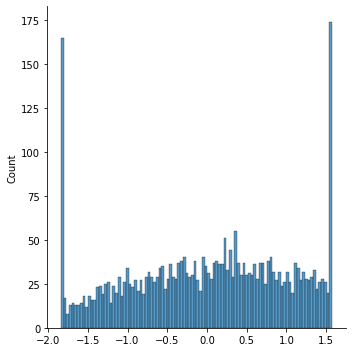

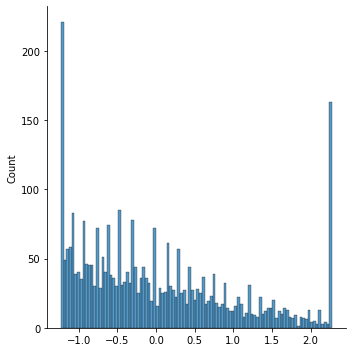

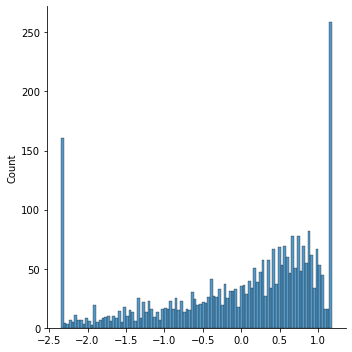

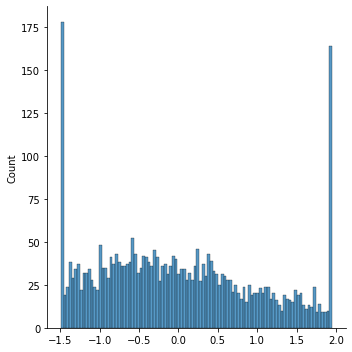

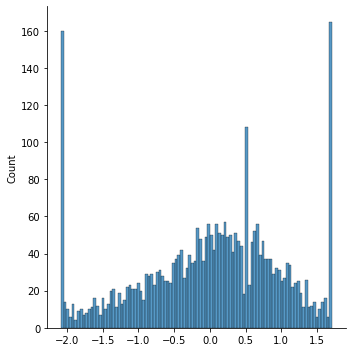

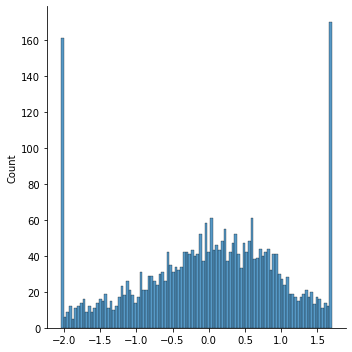

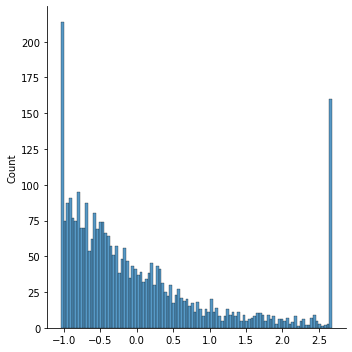

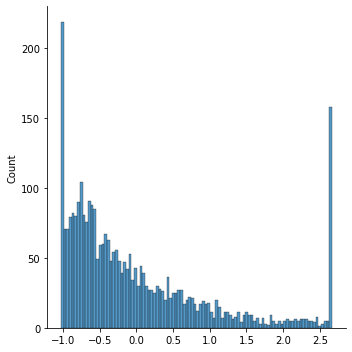

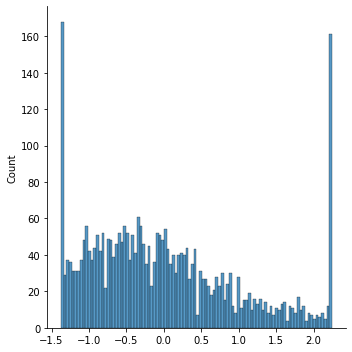

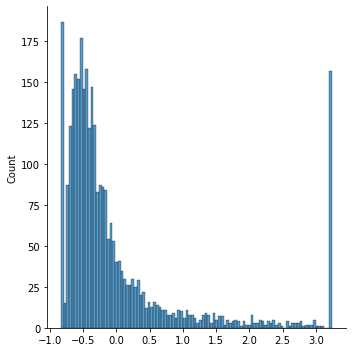

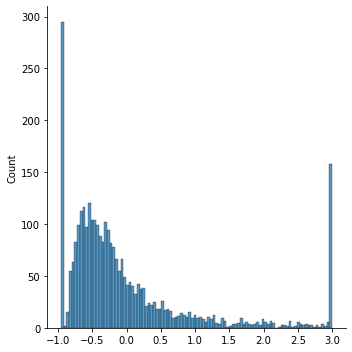

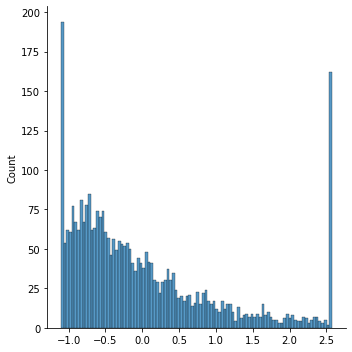

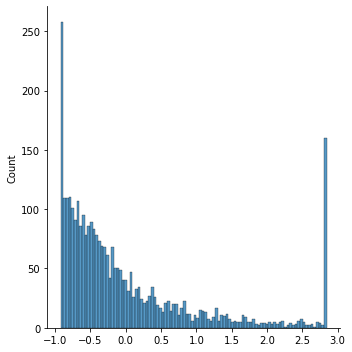

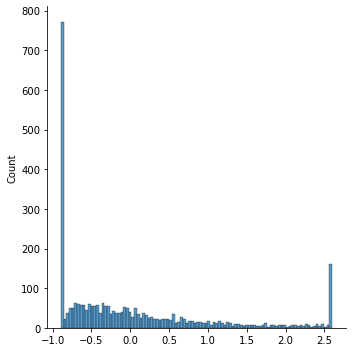

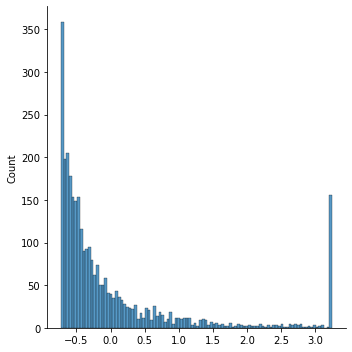

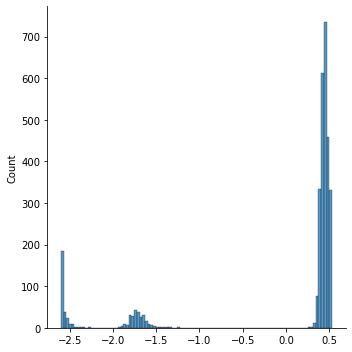

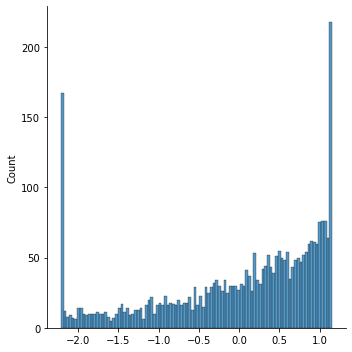

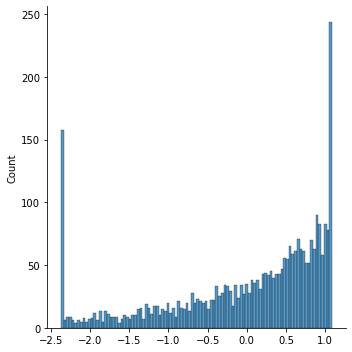

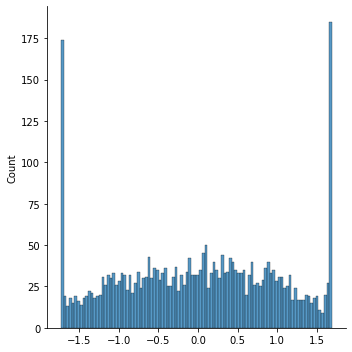

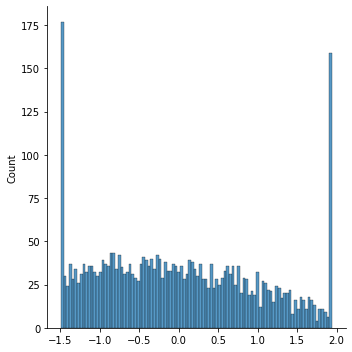

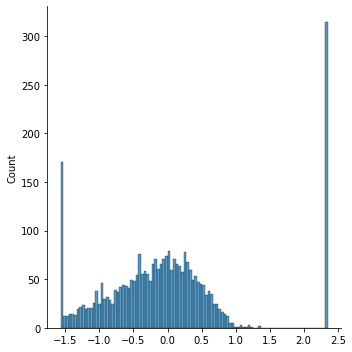

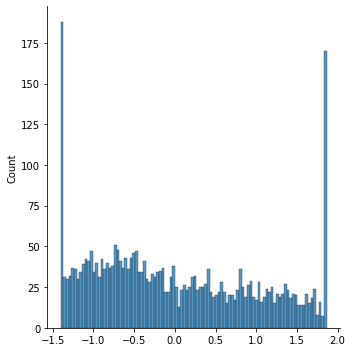

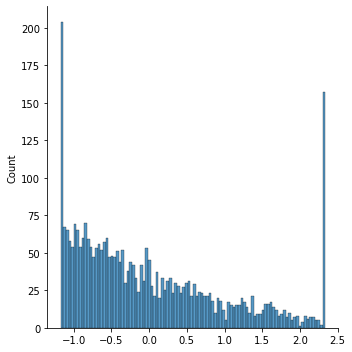

In [271]:
# 当日买入信号涨跌幅分布
for col in X.columns:
    plot = sns.displot(X[col].values, bins = 100)

In [106]:
Xtrain, Xtest, Ytrain, Ytest = train_test_split(X,Y,test_size=0.3,random_state=420)

In [22]:
Xtrain.shape

(2170, 22)

In [23]:
reg = LR1().fit(Xtrain, Ytrain)
yhat = reg.predict(Xtest)
yhat

array([-1.97185531e+00,  2.85065125e+00, -3.65379249e+00,  7.72945084e-02,
       -2.29107858e+00,  4.31977316e-01,  3.16065108e+00,  4.46775689e-01,
        2.82365004e+00,  2.93144928e+00, -7.58161326e-02,  3.17827066e+00,
        4.43229297e-02, -5.84440820e-01,  3.72190538e+00,  6.25879054e-01,
        2.80580358e+00,  1.12830477e+00,  7.55707586e-01, -3.80801012e-01,
        1.32831690e+00, -1.73159534e+00,  4.06033616e-01,  2.48294318e+00,
        3.23515769e-01, -6.08146484e-01,  8.33319037e-02,  7.09122827e-01,
        2.04620529e+00, -1.97816931e+00,  7.22762737e-01,  3.09292554e+00,
        2.14258604e+00,  5.89522473e-01, -1.43835797e+00,  8.97203746e-01,
       -1.34147155e+00, -4.39619861e+00, -2.98270945e+00, -5.57549123e-01,
       -1.61223298e+00, -4.59290166e-01, -1.12635677e+00,  1.06172205e+00,
        1.14576940e+00,  2.92061597e+00,  4.45235135e+00,  6.97568672e-01,
       -2.89395885e-01,  4.89165261e-01,  3.40688861e-01,  4.85645382e+00,
        7.14843329e-01, -

In [24]:
from sklearn.metrics import mean_squared_error as MSE
MSE(yhat,Ytest) 
# Y.max()
# Y.min()

53.75439004147788

In [25]:
# X[X.isnull().T.any()]

In [26]:
Y.max()

75.67

In [27]:
Y.min()

-48.79

In [28]:
# 均方误差
import sklearn
sorted(sklearn.metrics.SCORERS.keys())
cross_val_score(reg,X,Y,cv=10,scoring="neg_mean_squared_error")

array([-63.16396793, -69.81834816, -66.29763761, -47.73493552,
       -66.95735185, -63.49798436, -75.09597507, -56.76135913,
       -54.53747073, -56.87076898])

In [29]:
#调用R2
from sklearn.metrics import r2_score
# r2_score(yhat,Ytest)
r2 = reg.score(Xtest,Ytest)
r2

0.017000758208184696

In [30]:
r2_score(y_true = Ytest,y_pred = yhat)

0.017000758208184696

In [31]:
# 决策树回归
from sklearn.tree import DecisionTreeRegressor

In [32]:
TreeR = DecisionTreeRegressor(random_state=0).fit(Xtrain, Ytrain)

In [33]:
yhat = TreeR.predict(Xtest)
yhat

array([ -2.66,   9.09,  -8.61,  -6.74,   5.48,   8.74,   2.57,  -8.61,
         5.01,  -0.61,  -2.9 ,   0.9 ,   3.73,   5.09,   3.62,  10.21,
         7.01,  -0.81,  -6.33,  -4.  ,   0.28,   4.08,  -1.67,   8.68,
         0.28,  -1.88, -21.28,  16.36, -15.57,  -4.51,  -8.49,   3.42,
         1.92,  -1.99,  -0.58,  -5.18,  -2.18, -16.93,  -2.66, -10.75,
         3.91,  -2.49,  -7.27,  -5.17,  13.51,  10.46,   2.79,  11.89,
         1.41,   7.48,   1.63,  41.93,   5.6 ,   6.32,   6.63,  -0.38,
         3.86,   2.26,  -0.99,   0.33,   5.03,  44.98,  -0.76,  -2.63,
        -1.55,  19.87,   4.54,  -0.93,  -1.81,  -7.79,  11.37,  -7.25,
        -0.29,  -3.03,  -5.6 ,   1.59,   2.4 ,  -4.64,   8.91,  -0.22,
         6.7 ,   1.05,   7.69, -30.01,   3.42,  -6.35,  -5.07,  -2.18,
        17.2 ,  -4.81,  -4.55,  -7.04,   3.02,   2.38,   0.19,   3.78,
        14.3 ,   2.18,  -4.26,   1.49,  10.52,  -2.03,  -0.44,  10.46,
        20.07,   5.4 ,  -6.91,   1.2 ,  11.56,   0.66,  -0.64,  23.8 ,
      

In [34]:
def score(yhat,Ytest):
    print('真实值的最大值：',Ytest.max())
    print('真实值的最小值：',Ytest.min())
    print('真实值的平均值：',Ytest.mean())
    print('均方误差MSE：',MSE(yhat,Ytest))
    r2 = r2_score(y_true = Ytest,y_pred = yhat)
    print('R2：',r2)

In [35]:
score(yhat,Ytest)

真实值的最大值： 44.04
真实值的最小值： -30.35
真实值的平均值： 0.8591935483870958
均方误差MSE： 126.69924365591397
R2： -1.3169318887863573


In [36]:
# svm回归
from sklearn.svm import SVR

In [37]:
kernels = ['linear','poly','rbf','sigmoid']
for kernel in kernels:
    svr = SVR(kernel=kernel).fit(Xtrain,Ytrain)
    Ypredict = svr.predict(Xtest)
    print(kernel+"核函数支持向量机的默认评估值为：", svr.score(Xtest, Ytest))
    print(kernel+"核函数支持向量机的R_squared值为：", r2_score(Ytest, Ypredict ))
    score(Ypredict,Ytest)

linear核函数支持向量机的默认评估值为： 0.01733693081031429
linear核函数支持向量机的R_squared值为： 0.01733693081031429
真实值的最大值： 44.04
真实值的最小值： -30.35
真实值的平均值： 0.8591935483870958
均方误差MSE： 53.736006758553685
R2： 0.01733693081031429
poly核函数支持向量机的默认评估值为： -1.635485751113729
poly核函数支持向量机的R_squared值为： -1.635485751113729
真实值的最大值： 44.04
真实值的最小值： -30.35
真实值的平均值： 0.8591935483870958
均方误差MSE： 144.11906234626383
R2： -1.635485751113729
rbf核函数支持向量机的默认评估值为： 0.039201372017655944
rbf核函数支持向量机的R_squared值为： 0.039201372017655944
真实值的最大值： 44.04
真实值的最小值： -30.35
真实值的平均值： 0.8591935483870958
均方误差MSE： 52.540370332063624
R2： 0.039201372017655944
sigmoid核函数支持向量机的默认评估值为： -0.15605540868433154
sigmoid核函数支持向量机的R_squared值为： -0.15605540868433154
真实值的最大值： 44.04
真实值的最小值： -30.35
真实值的平均值： 0.8591935483870958
均方误差MSE： 63.217803947338815
R2： -0.15605540868433154


机器学习回归效果很差，试一下用分类吧

In [457]:
# 1为涨，0为跌
all_not_nan['pct_chg_0'] = np.where(
                        all_not_nan['pct_chg_10']>=0,
                        1,0)

In [458]:
Y = all_not_nan['pct_chg_0']
# X = all_not_nan[features_list]
Xtrain, Xtest, Ytrain, Ytest = train_test_split(X,Y,test_size=0.3,random_state=420)

In [383]:
Xtrain.shape

(2170, 23)

In [275]:
from sklearn.svm import SVC

In [276]:
kernels = ['linear','poly','rbf','sigmoid']
for kernel in kernels:
    clf = SVC(kernel=kernel).fit(Xtrain,Ytrain)
    Ypredict = clf.predict(Xtest)
    print(kernel+"核函数支持向量机的默认评估值为：", clf.score(Xtest, Ytest))
    eva(Ytest,Ypredict,Xtest,clf)
#     print(kernel+"核函数支持向量机的R_squared值为：", r2_score(Ytest, Ypredict ))

linear核函数支持向量机的默认评估值为： 0.5870967741935483
混淆矩阵：
 [[329 174]
 [210 217]]
总准确率； 0.5870967741935483
精准率： 0.6103896103896104
召回率： 0.6540755467196819
poly核函数支持向量机的默认评估值为： 0.567741935483871
混淆矩阵：
 [[360 143]
 [259 168]]
总准确率； 0.567741935483871
精准率： 0.5815831987075929
召回率： 0.7157057654075547
rbf核函数支持向量机的默认评估值为： 0.5774193548387097
混淆矩阵：
 [[312 191]
 [202 225]]
总准确率； 0.5774193548387097
精准率： 0.6070038910505836
召回率： 0.6202783300198808
sigmoid核函数支持向量机的默认评估值为： 0.532258064516129
混淆矩阵：
 [[275 228]
 [207 220]]
总准确率； 0.532258064516129
精准率： 0.5705394190871369
召回率： 0.5467196819085487


In [277]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier

In [278]:
clf = DecisionTreeClassifier(random_state=0)
rfc = RandomForestClassifier(random_state=0)
clf = clf.fit(Xtrain,Ytrain)
rfc = rfc.fit(Xtrain,Ytrain)
score_c = clf.score(Xtest,Ytest)
score_r = rfc.score(Xtest,Ytest)
print("Single Tree:{}".format(score_c),"Random Forest:{}".format(score_r))

Single Tree:0.5505376344086022 Random Forest:0.5978494623655914


In [279]:
from sklearn.metrics import confusion_matrix as CM, precision_score as P, recall_score as R

In [280]:
clf = SVC(kernel='linear').fit(Xtrain,Ytrain)
Ypredict = clf.predict(Xtest)
clf.score(Xtest,Ytest)

0.5870967741935483

In [214]:
def eva(Ytest,Ypredict,Xtest,clf):
    print("混淆矩阵：\n",CM(Ytest,Ypredict,labels=[1,0]))
    print('总准确率；',clf.score(Xtest,Ytest))
    print("精准率：",P(Ytest,Ypredict,labels=[1,0]))
    print("召回率：",R(Ytest,Ypredict,labels=[1,0]))

In [215]:
eva(Ytest,Ypredict,Xtest,clf)

混淆矩阵：
 [[329 174]
 [210 217]]
总准确率； 0.5870967741935483
精准率： 0.6103896103896104
召回率： 0.6540755467196819


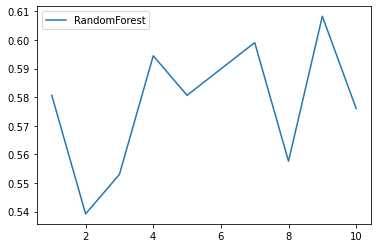

In [281]:
# 随机森林调优
rfc = RandomForestClassifier(n_estimators=25)
rfc_s = cross_val_score(rfc,Xtrain,Ytrain,cv=10)
plt.plot(range(1,11),rfc_s,label = "RandomForest")
plt.legend()
plt.show()

0.5824346607304807 98


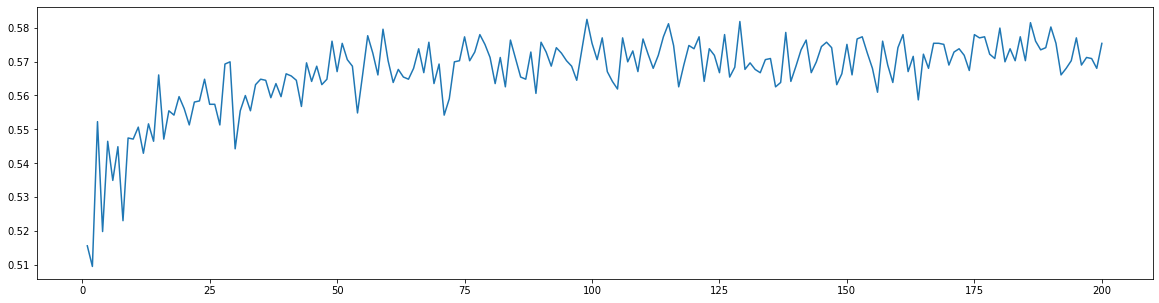

In [184]:
superpa = []
for i in range(200):
    rfc = RandomForestClassifier(n_estimators=i+1,n_jobs=-1)
    rfc_s = cross_val_score(rfc,X,Y,cv=10).mean()
    superpa.append(rfc_s)
print(max(superpa),superpa.index(max(superpa)))
plt.figure(figsize=[20,5])
plt.plot(range(1,201),superpa)
plt.show()

In [291]:
rfc = RandomForestClassifier(n_estimators=100,random_state=0)
rfc = rfc.fit(Xtrain,Ytrain)
Ypredict = rfc.predict(Xtest)

In [292]:
rfc.score(Xtest,Ytest)

0.5978494623655914

In [293]:
CM(Ytest,Ypredict,labels=[1,0])

array([[301, 202],
       [172, 255]], dtype=int64)

In [294]:
P(Ytest,Ypredict,labels=[1,0])

0.6363636363636364

In [295]:
R(Ytest,Ypredict,labels=[1,0])

0.5984095427435387

调整机器学习模型的参数，提高准确率

0.5946236559139785 0.1623232323232323


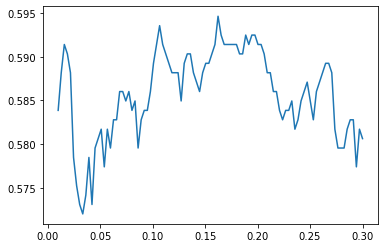

In [297]:
#换poly
score = []
C_range = np.linspace(0.01,0.3,100)
for i in C_range:
    clf = SVC(kernel="rbf",gamma = i,cache_size=5000).fit(Xtrain,Ytrain)
    score.append(clf.score(Xtest,Ytest))
print(max(score), C_range[score.index(max(score))])
plt.plot(C_range,score)
plt.show()

0.5956989247311828 1.233877551020408


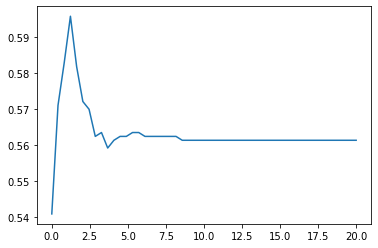

In [298]:
#换rbf
score = []
C_range = np.linspace(0.01,20,50)
for i in C_range:
    clf = SVC(kernel="rbf",C=i,gamma = 0.1623232323232323,cache_size=5000).fit(Xtrain,Ytrain)
    score.append(clf.score(Xtest,Ytest))
print(max(score), C_range[score.index(max(score))])
plt.plot(C_range,score)
plt.show()

0.5844017094017094 3.0408163265306123


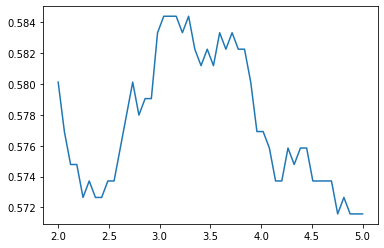

In [44]:
#进一步细化
score = []
C_range = np.linspace(2,5,50)
for i in C_range:
    clf = SVC(kernel="rbf",C=i,gamma = 0.023793103448275864,cache_size=5000).fit(Xtrain,Ytrain)
    score.append(clf.score(Xtest,Ytest))
print(max(score), C_range[score.index(max(score))])
plt.plot(C_range,score)
plt.show()

In [299]:
clf = SVC(kernel="rbf",C= 1.233877551020408, gamma = 0.1623232323232323,cache_size=5000).fit(Xtrain,Ytrain)
Ypredict = clf.predict(Xtest)
clf.score(Xtest,Ytest)

0.5956989247311828

In [300]:
eva(Ytest,Ypredict,Xtest,clf)

混淆矩阵：
 [[318 185]
 [191 236]]
总准确率； 0.5956989247311828
精准率： 0.6247544204322201
召回率： 0.6322067594433399


In [301]:
# Ypredict

In [302]:
# 逻辑回归
from sklearn.linear_model import LogisticRegression as LR
lrl1 = LR(penalty="l1",solver="liblinear",C=0.5,max_iter=1000)
lrl2 = LR(penalty="l2",solver="liblinear",C=0.5,max_iter=1000)
#逻辑回归的重要属性coef_，查看每个特征所对应的参数
lrl1 = lrl1.fit(X,Y)
lrl1.coef_

array([[-0.02290762,  0.0425524 ,  0.03611211, -0.14633838,  0.00228936,
         0.26497481,  0.06972529,  0.05278929,  0.0666756 ,  0.05751361,
        -0.07645156,  0.03182433, -0.04245912,  0.06344174, -0.0493365 ,
        -0.03339623,  0.21410436,  0.00342075,  0.        ,  0.0147977 ,
         0.1532802 ,  0.02394453, -0.01849648]])

In [303]:
(lrl1.coef_ != 0).sum(axis=1)

array([22])

In [304]:
lrl2 = lrl2.fit(X,Y)
lrl2.coef_

array([[-0.03104415,  0.04827534,  0.05416726, -0.14565738,  0.01238462,
         0.26764253,  0.07183821,  0.0550294 ,  0.07811139,  0.06603716,
        -0.08344948,  0.03728693, -0.04782921,  0.0676576 , -0.05246076,
        -0.03773987,  0.22247456,  0.01352208, -0.01890896,  0.03011053,
         0.15391575,  0.02318706, -0.024291  ]])

In [305]:
from sklearn.metrics import accuracy_score

In [306]:
lrl1 = lrl1.fit(Xtrain,Ytrain)
Ypredict = lrl1.predict(Xtest)
accuracy_score(Ypredict,Ytest)

0.5860215053763441

In [307]:
eva(Ytest,Ypredict,Xtest,lrl1)

混淆矩阵：
 [[328 175]
 [210 217]]
总准确率； 0.5860215053763441
精准率： 0.6096654275092936
召回率： 0.6520874751491054


In [308]:
lrl2 = lrl2.fit(Xtrain,Ytrain)
Ypredict = lrl2.predict(Xtest)
eva(Ytest,Ypredict,Xtest,lrl2)

混淆矩阵：
 [[328 175]
 [206 221]]
总准确率； 0.5903225806451613
精准率： 0.6142322097378277
召回率： 0.6520874751491054


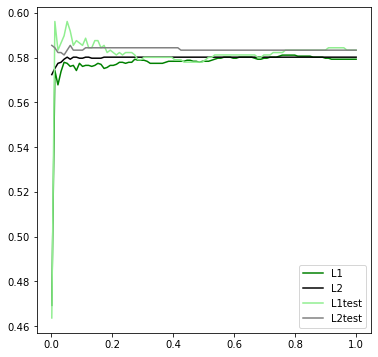

In [145]:
l1=[]
l2=[]
l1test=[]
l2test=[]
for i in np.linspace(0.001,1,100):
    lrl1 = LR(penalty="l1",solver="liblinear",C=i,max_iter=1000)
    lrl2 = LR(penalty="l2",solver="liblinear",C=i,max_iter=1000)

    lrl1 = lrl1.fit(Xtrain,Ytrain)
    l1.append(accuracy_score(lrl1.predict(Xtrain),Ytrain))
    l1test.append(accuracy_score(lrl1.predict(Xtest),Ytest))

    lrl2 = lrl2.fit(Xtrain,Ytrain)
    l2.append(accuracy_score(lrl2.predict(Xtrain),Ytrain))
    l2test.append(accuracy_score(lrl2.predict(Xtest),Ytest))
graph = [l1,l2,l1test,l2test]
color = ["green","black","lightgreen","gray"]
label = ["L1","L2","L1test","L2test"] 
plt.figure(figsize=(6,6))
for i in range(len(graph)):
    plt.plot(np.linspace(0.001,1,100),graph[i],color[i],label=label[i])
plt.legend(loc=4) #图例的位置在哪里?4表示，右下角
plt.show()

In [255]:
from sklearn.feature_selection import SelectFromModel

In [256]:
LR_ = LR(solver="liblinear",C=0.9,random_state=420,max_iter=100)
cross_val_score(LR_,X,Y,cv=10)

array([0.58387097, 0.63225806, 0.59354839, 0.57419355, 0.57741935,
       0.5516129 , 0.57096774, 0.56129032, 0.61290323, 0.5516129 ])

In [257]:
X_embedded = SelectFromModel(LR_,norm_order=1).fit_transform(X,Y)
X_embedded.shape

(3100, 6)

In [258]:
cross_val_score(LR_,X_embedded,Y,cv=10).mean()

0.5877419354838709

In [309]:
# 绘制ROC曲线
from sklearn.metrics import roc_curve
FPR, recall, thresholds = roc_curve(Y,clf.decision_function(X), pos_label=1)
# FPR
# thresholds #此时的threshold就不是一个概率值，而是距离值中的阈值了，所以它可以大于1，也可以为负

In [310]:
# recall

In [311]:
# thresholds #此时的threshold就不是一个概率值，而是距离值中的阈值了，所以它可以大于1，也可以为负

In [312]:
from sklearn.metrics import roc_auc_score as AUC
area = AUC(Y,clf.decision_function(X))
area

0.9426132272029325

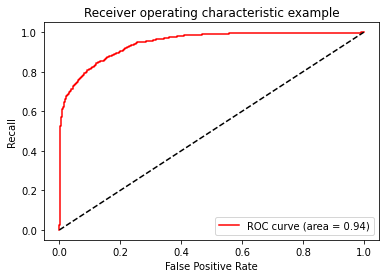

In [313]:
plt.figure()
plt.plot(FPR, recall, color='red',label='ROC curve (area = %0.2f)' % area)
plt.plot([0, 1], [0, 1], color='black', linestyle='--')
plt.xlim([-0.05, 1.05])
plt.ylim([-0.05, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('Recall')
plt.title('Receiver operating characteristic example')
plt.legend(loc="lower right")
plt.show()

In [314]:
maxindex = (recall - FPR).tolist().index(max(recall - FPR))
thresholds[maxindex]

0.06703898246205468

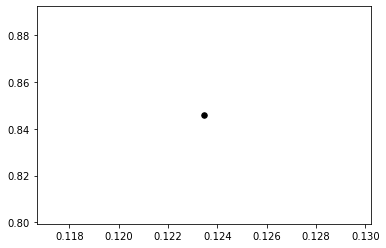

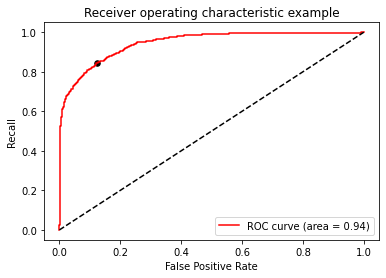

In [315]:
#我们可以在图像上来看看这个点在哪里
plt.scatter(FPR[maxindex],recall[maxindex],c="black",s=30) #把上述代码放入这段代码中：
plt.figure()
plt.plot(FPR, recall, color='red',label='ROC curve (area = %0.2f)' % area)
plt.plot([0, 1], [0, 1], color='black', linestyle='--')
plt.scatter(FPR[maxindex],recall[maxindex],c="black",s=30)
plt.xlim([-0.05, 1.05])
plt.ylim([-0.05, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('Recall')
plt.title('Receiver operating characteristic example')
plt.legend(loc="lower right")
plt.show()

In [362]:
# 设置最佳阈值
Ypredict = np.where(clf.decision_function(X)>=0.06703898246205468,1,0)
# Ypredict

In [363]:
eva(Y,Ypredict,X,clf)

混淆矩阵：
 [[1219  423]
 [  80 1378]]
总准确率； 0.8609677419354839
精准率： 0.9384141647421094
召回率： 0.7423873325213155


删除相关性高的字段

In [90]:
X.corr()

,RSI,5upcross60,now_high_close,std_60,30_down,diff_MA60-MA90,close,turnover_rate,volume_ratio,pe,pe_ttm,pb,ps,dv_ratio,total_mv,alpha001,alpha005,alpha020,alpha025,alpha033,alpha039,alpha088,pct_chg
RSI,1.000000,0.324457,-0.136119,0.111044,0.606501,0.162652,0.020322,0.137769,0.369283,0.037058,-0.015439,0.004369,-0.015239,0.049049,0.016705,0.488094,0.012690,-0.147087,-0.196121,-0.259348,-0.028145,-0.363344,0.293337
5upcross60,0.324457,1.000000,-0.139539,0.262182,0.119865,-0.104640,0.095661,0.210440,0.029331,0.029811,0.003870,0.015059,0.044316,-0.068108,-0.030532,0.110117,-0.070251,-0.025848,-0.189073,-0.101603,-0.061099,-0.299015,0.156745
now_high_close,-0.136119,-0.139539,1.000000,-0.196807,-0.030916,0.076943,-0.033598,-0.232713,-0.324907,-0.066374,-0.006344,-0.012669,-0.049697,0.080958,0.027027,-0.049370,-0.027679,0.183106,0.619687,-0.098666,0.012126,0.260552,-0.050580
std_60,0.111044,0.262182,-0.196807,1.000000,-0.091980,-0.304968,0.102232,0.251247,-0.114125,0.061239,0.028349,0.047212,0.052185,-0.167196,-0.113337,-0.047755,-0.029503,-0.012522,-0.215428,-0.084925,-0.124835,-0.326882,0.190940
30_down,0.606501,0.119865,-0.030916,-0.091980,1.000000,0.116693,0.038020,0.090411,0.462992,-0.040252,-0.026539,-0.008467,-0.047012,0.075733,0.022988,0.423744,0.005596,-0.195200,-0.161991,-0.345444,0.001465,-0.141999,0.394074
diff_MA60-MA90,0.162652,-0.104640,0.076943,-0.304968,0.116693,1.000000,-0.045360,-0.113570,0.035779,0.012911,0.014401,-0.023883,-0.036757,0.094794,0.051752,0.076588,0.017460,-0.023547,0.100640,0.060665,0.022393,0.114573,-0.096243
close,0.020322,0.095661,-0.033598,0.102232,0.038020,-0.045360,1.000000,0.129582,-0.003659,0.005726,-0.006025,0.074113,0.163250,-0.071068,0.144353,0.013914,-0.159615,-0.015483,-0.142009,-0.042026,-0.020774,-0.030899,0.077205
turnover_rate,0.137769,0.210440,-0.232713,0.251247,0.090411,-0.113570,0.129582,1.000000,0.300762,0.071452,0.025472,0.026194,0.101637,-0.213539,-0.097057,0.123196,-0.115881,-0.051931,-0.361125,-0.221147,0.130837,-0.223631,0.341540
volume_ratio,0.369283,0.029331,-0.324907,-0.114125,0.462992,0.035779,-0.003659,0.300762,1.000000,0.012947,-0.008617,0.006918,0.016386,-0.020522,-0.032466,0.386426,0.017619,-0.186113,-0.386707,-0.409197,0.012894,-0.175699,0.515050
pe,0.037058,0.029811,-0.066374,0.061239,-0.040252,0.012911,0.005726,0.071452,0.012947,1.000000,0.046459,0.060362,0.137271,-0.176626,-0.034885,0.025496,-0.107255,0.022075,-0.067173,-0.012769,-0.080683,0.004540,0.030835


In [91]:
# 使用np.eye忽略对角线值并查找具有某个绝对值大于阈值的值的所有列。使用逻辑否定作为索引和列的掩码。
m = ~(X.corr().mask(np.eye(len(X.corr()), dtype=bool)).abs() > 0.70).any()
raw = X.corr().loc[m, m]
raw

,RSI,5upcross60,now_high_close,std_60,30_down,diff_MA60-MA90,close,turnover_rate,volume_ratio,pe,pe_ttm,pb,ps,dv_ratio,total_mv,alpha001,alpha005,alpha020,alpha025,alpha033,alpha039,alpha088,pct_chg
RSI,1.000000,0.324457,-0.136119,0.111044,0.606501,0.162652,0.020322,0.137769,0.369283,0.037058,-0.015439,0.004369,-0.015239,0.049049,0.016705,0.488094,0.012690,-0.147087,-0.196121,-0.259348,-0.028145,-0.363344,0.293337
5upcross60,0.324457,1.000000,-0.139539,0.262182,0.119865,-0.104640,0.095661,0.210440,0.029331,0.029811,0.003870,0.015059,0.044316,-0.068108,-0.030532,0.110117,-0.070251,-0.025848,-0.189073,-0.101603,-0.061099,-0.299015,0.156745
now_high_close,-0.136119,-0.139539,1.000000,-0.196807,-0.030916,0.076943,-0.033598,-0.232713,-0.324907,-0.066374,-0.006344,-0.012669,-0.049697,0.080958,0.027027,-0.049370,-0.027679,0.183106,0.619687,-0.098666,0.012126,0.260552,-0.050580
std_60,0.111044,0.262182,-0.196807,1.000000,-0.091980,-0.304968,0.102232,0.251247,-0.114125,0.061239,0.028349,0.047212,0.052185,-0.167196,-0.113337,-0.047755,-0.029503,-0.012522,-0.215428,-0.084925,-0.124835,-0.326882,0.190940
30_down,0.606501,0.119865,-0.030916,-0.091980,1.000000,0.116693,0.038020,0.090411,0.462992,-0.040252,-0.026539,-0.008467,-0.047012,0.075733,0.022988,0.423744,0.005596,-0.195200,-0.161991,-0.345444,0.001465,-0.141999,0.394074
diff_MA60-MA90,0.162652,-0.104640,0.076943,-0.304968,0.116693,1.000000,-0.045360,-0.113570,0.035779,0.012911,0.014401,-0.023883,-0.036757,0.094794,0.051752,0.076588,0.017460,-0.023547,0.100640,0.060665,0.022393,0.114573,-0.096243
close,0.020322,0.095661,-0.033598,0.102232,0.038020,-0.045360,1.000000,0.129582,-0.003659,0.005726,-0.006025,0.074113,0.163250,-0.071068,0.144353,0.013914,-0.159615,-0.015483,-0.142009,-0.042026,-0.020774,-0.030899,0.077205
turnover_rate,0.137769,0.210440,-0.232713,0.251247,0.090411,-0.113570,0.129582,1.000000,0.300762,0.071452,0.025472,0.026194,0.101637,-0.213539,-0.097057,0.123196,-0.115881,-0.051931,-0.361125,-0.221147,0.130837,-0.223631,0.341540
volume_ratio,0.369283,0.029331,-0.324907,-0.114125,0.462992,0.035779,-0.003659,0.300762,1.000000,0.012947,-0.008617,0.006918,0.016386,-0.020522,-0.032466,0.386426,0.017619,-0.186113,-0.386707,-0.409197,0.012894,-0.175699,0.515050
pe,0.037058,0.029811,-0.066374,0.061239,-0.040252,0.012911,0.005726,0.071452,0.012947,1.000000,0.046459,0.060362,0.137271,-0.176626,-0.034885,0.025496,-0.107255,0.022075,-0.067173,-0.012769,-0.080683,0.004540,0.030835


In [92]:
# 使用np.eye忽略对角线值并查找具有某个绝对值大于阈值的值的所有列。使用逻辑否定作为索引和列的掩码。
m = (X.corr().mask(np.eye(len(X.corr()), dtype=bool)).abs() > 0.70).any()
raw = X.corr().loc[m, m]
raw

""


In [52]:
corr_dict = {}
for col in raw.columns:
    corr_dict[col] = list(raw[abs(raw[col])>0.7].index)
my_df = pd.DataFrame.from_dict(corr_dict, orient='index')
my_df

,0,1,2,3,4
turnover_rate,turnover_rate,turnover_rate_f,None,None,None
turnover_rate_f,turnover_rate,turnover_rate_f,None,None,None
ps,ps,ps_ttm,None,None,None
ps_ttm,ps,ps_ttm,None,None,None
dv_ratio,dv_ratio,dv_ttm,None,None,None
dv_ttm,dv_ratio,dv_ttm,None,None,None
total_share,total_share,float_share,free_share,total_mv,circ_mv
float_share,total_share,float_share,free_share,total_mv,circ_mv
free_share,total_share,float_share,free_share,None,None
total_mv,total_share,float_share,total_mv,circ_mv,None


In [332]:
def pct_mean(all_up_data):
    print('5days',all_up_data['pct_chg_5'].mean())
    print('10days',all_up_data['pct_chg_10'].mean())
    print('20days',all_up_data['pct_chg_20'].mean())
    print('30days',all_up_data['pct_chg_30'].mean())

In [333]:
pct_mean(all_not_nan)

5days 0.4968741935483878
10days 0.9896967741935493
20days 2.1072612903225796
30days 3.455580645161283


In [359]:
all_not_nan['signal'] = Ypredict
all_not_nan

,,trade_type,pct_chg,pct_chg_5,pct_chg_10,pct_chg_20,pct_chg_30,RSI,5upcross60,now_high_close,std_60,30_down,diff_MA60-MA90,close,turnover_rate,turnover_rate_f,volume_ratio,pe,pe_ttm,pb,ps,ps_ttm,dv_ratio,dv_ttm,total_share,float_share,free_share,total_mv,circ_mv,alpha001,alpha005,alpha020,alpha025,alpha033,alpha039,alpha088,pct_chg_0,signal
Date,ts_code,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
2016-11-21,000001.SZ,1,0.65,4.16,2.35,-0.48,-0.90,57.708698,0.07,-0.42,1.1660,-0.66,0.32,9.24,0.5811,1.1172,1.43,7.2561,6.9451,0.8899,1.6499,1.4830,1.2500,1.3800,1.717041e+06,1.463118e+06,761028.1784,1.586546e+07,1.351921e+07,0.842385,-0.121575,-0.073443,0.346562,0.306969,-0.686620,0.927544,1,1
2021-04-23,000001.SZ,1,1.35,0.02,1.13,8.24,0.00,65.337542,1.32,-1.51,5.3557,0.25,4.02,23.29,0.4242,0.9571,0.81,15.6237,14.8127,1.4932,2.9436,2.8714,0.9360,0.9360,1.940592e+06,1.940575e+06,860111.3751,4.519638e+07,4.519600e+07,0.842385,-0.962472,-0.913970,0.051425,0.571350,-1.794029,0.309735,1,0
2019-10-17,000002.SZ,1,1.03,-2.53,-2.99,-3.54,1.64,58.428737,0.16,-1.08,1.8504,-1.64,-0.53,27.35,0.7002,1.2265,0.90,9.1528,8.4710,2.0717,1.0384,0.9338,3.2141,3.8212,1.130214e+06,9.715170e+05,554628.8780,3.091136e+07,2.657099e+07,0.845245,-0.588069,-0.125741,0.163746,0.362605,-1.007196,0.648746,0,0
2016-04-14,000006.SZ,1,1.08,0.57,-4.58,-13.75,-12.60,50.554701,0.79,-0.80,5.7505,-6.03,-9.95,8.39,1.4573,2.2163,0.82,27.1779,27.1779,2.5782,3.0995,3.0995,1.4064,1.4064,1.349995e+05,1.340266e+05,88126.7886,1.132646e+06,1.124483e+06,0.841821,-0.184696,-0.604189,0.178123,0.529846,-0.641373,0.881206,0,0
2019-02-14,000006.SZ,1,1.08,0.16,8.13,6.38,16.11,65.676599,1.25,-1.26,3.8168,0.32,2.11,5.64,1.2510,1.9560,1.40,9.4509,8.6014,1.2264,2.5728,3.0420,3.2092,3.2092,1.349995e+05,1.348308e+05,86230.9824,7.613972e+05,7.604457e+05,0.841821,-0.189062,-0.274154,0.269576,0.305851,-0.889919,0.083333,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2021-04-01,603998.SH,1,0.38,0.76,9.36,17.53,19.85,49.476538,0.05,-0.19,2.7518,-3.11,-5.95,5.25,0.2742,0.5174,0.68,28.5703,32.7371,1.9610,2.0613,1.8801,2.2975,2.2975,4.294297e+04,4.294297e+04,22761.5945,2.254506e+05,2.254506e+05,0.079637,-0.019093,-0.113690,0.426075,0.501659,-0.658975,0.730591,1,0
2021-03-22,603999.SH,1,3.14,-0.93,-0.62,5.35,-0.39,57.226326,0.21,0.00,2.7348,-2.20,-4.86,5.26,0.5796,1.3747,2.10,46.8646,40.7972,1.7321,3.1175,2.7954,0.6464,0.6464,5.760000e+04,5.760000e+04,24285.4056,3.029760e+05,3.029760e+05,0.851016,-0.033216,-0.072276,0.474886,0.111028,-1.041150,0.556639,0,0
2021-03-30,605118.SH,1,2.01,9.36,14.58,-0.61,-4.20,53.980823,0.05,-0.54,4.8783,-4.47,-5.92,14.74,2.9443,2.9443,0.72,32.9829,36.4366,5.4980,12.8405,13.5354,0.0000,0.0000,4.055000e+04,4.100000e+03,4100.0000,5.977070e+05,6.043400e+04,0.068783,-0.190436,-0.086131,0.292553,0.227053,0.000000,0.202899,1,0


In [360]:
learning_df = all_not_nan[all_not_nan['signal']==1]
learning_df

,,trade_type,pct_chg,pct_chg_5,pct_chg_10,pct_chg_20,pct_chg_30,RSI,5upcross60,now_high_close,std_60,30_down,diff_MA60-MA90,close,turnover_rate,turnover_rate_f,volume_ratio,pe,pe_ttm,pb,ps,ps_ttm,dv_ratio,dv_ttm,total_share,float_share,free_share,total_mv,circ_mv,alpha001,alpha005,alpha020,alpha025,alpha033,alpha039,alpha088,pct_chg_0,signal
Date,ts_code,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
2016-11-21,000001.SZ,1,0.65,4.16,2.35,-0.48,-0.90,57.708698,0.07,-0.42,1.1660,-0.66,0.32,9.24,0.5811,1.1172,1.43,7.2561,6.9451,0.8899,1.6499,1.4830,1.2500,1.3800,1.717041e+06,1.463118e+06,761028.1784,1.586546e+07,1.351921e+07,0.842385,-0.121575,-0.073443,0.346562,0.306969,-0.686620,0.927544,1,1
2019-02-14,000006.SZ,1,1.08,0.16,8.13,6.38,16.11,65.676599,1.25,-1.26,3.8168,0.32,2.11,5.64,1.2510,1.9560,1.40,9.4509,8.6014,1.2264,2.5728,3.0420,3.2092,3.2092,1.349995e+05,1.348308e+05,86230.9824,7.613972e+05,7.604457e+05,0.841821,-0.189062,-0.274154,0.269576,0.305851,-0.889919,0.083333,1,1
2018-04-12,000009.SZ,1,0.48,-2.63,-6.72,-2.43,-5.45,53.394291,0.47,-0.68,5.3980,-5.26,-5.59,6.26,0.8175,0.9936,0.67,57.6514,66.1183,2.8934,2.0985,1.8962,0.3195,0.3195,2.149345e+05,2.120089e+05,174428.7793,1.345490e+06,1.327176e+06,0.241450,-0.124004,-0.099795,0.398470,0.451688,-0.880894,0.478463,0,1
2015-03-06,000011.SZ,1,2.94,2.16,11.58,23.06,52.31,61.882218,0.47,-2.49,3.7933,2.21,1.90,9.80,10.3346,12.5169,2.84,19.4143,21.8173,2.9537,3.6070,6.1477,2.5510,2.5510,5.959791e+04,1.758626e+04,14520.1889,5.840595e+05,1.723454e+05,0.844625,-0.031979,-0.405080,0.184916,0.174682,-0.950094,0.375898,1,1
2014-07-28,000012.SZ,1,1.27,3.34,3.74,3.34,7.34,65.427010,0.29,-0.79,2.2295,1.22,-2.14,7.19,3.3688,3.9691,2.37,9.7151,9.6187,1.9745,1.9294,1.9229,2.0862,4.1725,2.075336e+05,1.302467e+05,110546.7779,1.492166e+06,9.364740e+05,0.845346,-0.017787,-0.319315,0.260623,0.274664,0.000000,0.261771,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2016-04-01,603969.SH,1,5.06,-0.24,0.38,-4.42,-13.93,61.422624,1.13,-1.17,5.4699,2.39,-11.32,14.33,6.4071,6.4071,2.45,43.6288,52.4608,3.8793,2.8910,3.8594,0.5200,0.5200,4.000000e+04,1.318741e+04,13187.4100,5.732000e+05,1.889756e+05,0.849338,-0.317458,-0.157242,0.083388,0.057516,-1.507442,0.238562,1,1
2020-11-24,603989.SH,1,1.04,-1.43,7.56,-2.36,-9.93,50.951711,0.07,-0.87,3.0252,-4.03,-4.58,27.30,0.6174,1.8038,0.96,32.0311,27.8705,4.4827,4.7974,4.5410,1.0818,1.0835,3.961651e+04,3.961651e+04,13558.6640,1.081531e+06,1.081531e+06,0.229480,-0.671328,-0.052964,0.183505,0.354817,-0.637307,0.651967,1,1
2019-08-22,603997.SH,1,4.80,3.44,0.16,12.66,10.31,62.344409,0.16,-0.54,2.6451,-1.23,-6.30,7.86,0.8171,3.3844,2.85,16.6205,18.4457,2.7857,2.3361,2.4033,3.5529,3.9695,6.394132e+04,6.318708e+04,15254.9353,5.025788e+05,4.966505e+05,0.843949,-0.065119,-0.134027,0.285007,0.069086,-0.782182,0.224006,1,1


In [361]:
pct_mean(learning_df)

5days 2.850413005272409
10days 6.031230228470997
20days 8.121599297012303
30days 10.457838312829496


In [343]:
learning_df.to_csv(r"D:\量化\每日量化选股\MACD背离选法\机器学习筛选04.csv.",encoding='GBK')

In [378]:
X

,,RSI,5upcross60,now_high_close,std_60,30_down,diff_MA60-MA90,close,turnover_rate,volume_ratio,pe,pe_ttm,pb,ps,dv_ratio,total_mv,alpha001,alpha005,alpha020,alpha025,alpha033,alpha039,alpha088,pct_chg
Date,ts_code,,,,,,,,,,,,,,,,,,,,,,,
2016-11-21,000001.SZ,57.708698,0.07,-0.42,1.1660,-0.66,0.32,9.24,0.5811,1.43,7.2561,6.9451,0.8899,1.6499,1.2500,1.586546e+07,0.842385,-0.121575,-0.073443,0.346562,0.306969,-0.686620,0.927544,0.65
2021-04-23,000001.SZ,65.337542,1.32,-1.51,5.3557,0.25,4.02,23.29,0.4242,0.81,15.6237,14.8127,1.4932,2.9436,0.9360,4.519638e+07,0.842385,-0.962472,-0.913970,0.051425,0.571350,-1.794029,0.309735,1.35
2019-10-17,000002.SZ,58.428737,0.16,-1.08,1.8504,-1.64,-0.53,27.35,0.7002,0.90,9.1528,8.4710,2.0717,1.0384,3.2141,3.091136e+07,0.845245,-0.588069,-0.125741,0.163746,0.362605,-1.007196,0.648746,1.03
2016-04-14,000006.SZ,50.554701,0.79,-0.80,5.7505,-6.03,-9.95,8.39,1.4573,0.82,27.1779,27.1779,2.5782,3.0995,1.4064,1.132646e+06,0.841821,-0.184696,-0.604189,0.178123,0.529846,-0.641373,0.881206,1.08
2019-02-14,000006.SZ,65.676599,1.25,-1.26,3.8168,0.32,2.11,5.64,1.2510,1.40,9.4509,8.6014,1.2264,2.5728,3.2092,7.613972e+05,0.841821,-0.189062,-0.274154,0.269576,0.305851,-0.889919,0.083333,1.08
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2021-04-01,603998.SH,49.476538,0.05,-0.19,2.7518,-3.11,-5.95,5.25,0.2742,0.68,28.5703,32.7371,1.9610,2.0613,2.2975,2.254506e+05,0.079637,-0.019093,-0.113690,0.426075,0.501659,-0.658975,0.730591,0.38
2021-03-22,603999.SH,57.226326,0.21,0.00,2.7348,-2.20,-4.86,5.26,0.5796,2.10,46.8646,40.7972,1.7321,3.1175,0.6464,3.029760e+05,0.851016,-0.033216,-0.072276,0.474886,0.111028,-1.041150,0.556639,3.14
2021-03-30,605118.SH,53.980823,0.05,-0.54,4.8783,-4.47,-5.92,14.74,2.9443,0.72,32.9829,36.4366,5.4980,12.8405,0.0000,5.977070e+05,0.068783,-0.190436,-0.086131,0.292553,0.227053,0.000000,0.202899,2.01


In [376]:
all_not_nan.std()

trade_type         0.000000e+00
pct_chg            1.334669e+00
pct_chg_5          5.018757e+00
pct_chg_10         8.000470e+00
pct_chg_20         1.199681e+01
pct_chg_30         1.675041e+01
RSI                3.614286e+00
5upcross60         4.004973e-01
now_high_close     8.077414e-01
std_60             1.329486e+00
30_down            1.753271e+00
diff_MA60-MA90     2.631561e+00
close              1.966411e+01
turnover_rate      2.080007e+00
turnover_rate_f    2.551837e+00
volume_ratio       5.935206e-01
pe                 1.892548e+02
pe_ttm             4.152213e+03
pb                 1.142047e+01
ps                 1.028789e+01
ps_ttm             7.848807e+00
dv_ratio           1.497956e+00
dv_ttm             1.447962e+00
total_share        1.716534e+06
float_share        1.297210e+06
free_share         2.413566e+05
total_mv           9.960976e+06
circ_mv            7.408319e+06
alpha001           2.161637e-01
alpha005           2.201327e-01
alpha020           1.934485e-01
alpha025

In [379]:
import joblib
#将训练的模型保存到磁盘(value=模型名)   默认当前文件夹下
joblib.dump(filename='svm.pkl',value=clf)
# 下载本地模型
# model1 = joblib.load(filename="svm.pkl")

['svm.pkl']

In [463]:
# 下载本地模型
model1 = joblib.load(filename="svm.pkl")
# Ypredict = model1.predict(X)
Ypredict = np.where(model1.decision_function(X)>=0.06703898246205468,1,0)
eva(Y,Ypredict,X,model1)

混淆矩阵：
 [[1389  253]
 [ 180 1278]]
总准确率； 0.8609677419354839
精准率： 0.8852772466539197
召回率： 0.8459196102314251


In [387]:
# X.to_csv('basic.csv',encoding='gbk')

In [403]:
# all_data0[all_data0.isnull().T.any()]

这个是新输入转化预测数据的一个整理

In [408]:
my_list = ['RSI',
 '5upcross60',
 'now_high_close',
 'std_60',
 '30_down',
 'diff_MA60-MA90',
 'close',
 'turnover_rate',
 'volume_ratio',
 'pe',
 'pe_ttm',
 'pb',
 'ps',
 'dv_ratio',
 'total_mv',
 'alpha001',
 'alpha005',
 'alpha020',
 'alpha025',
 'alpha033',
 'alpha039',
 'alpha088',
 'pct_chg']


In [406]:
my_predict = all_data0[all_data0['pct_chg_10'].isnull()]
my_predict

,,trade_type,pct_chg,pct_chg_5,pct_chg_10,pct_chg_20,pct_chg_30,RSI,5upcross60,now_high_close,std_60,30_down,diff_MA60-MA90,close,turnover_rate,turnover_rate_f,volume_ratio,pe,pe_ttm,pb,ps,ps_ttm,dv_ratio,dv_ttm,total_share,float_share,free_share,total_mv,circ_mv,alpha001,alpha005,alpha020,alpha025,alpha033,alpha039,alpha088
Date,ts_code,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
2021-05-27,000063.SZ,1,2.62,7.32,NaN,NaN,NaN,63.276757,0.60,-1.30,2.4419,0.50,-4.34,30.54,1.9296,2.6121,1.53,33.0757,24.8868,3.0745,1.3888,1.3266,0.6549,0.6549,461343.4898,385736.6943,284948.8543,1.408943e+07,1.178040e+07,0.841385,-0.502361,-0.072387,0.117716,0.153314,-0.630999,0.311239
2021-05-31,000697.SZ,1,1.79,-5.90,NaN,NaN,NaN,54.138457,0.32,-0.62,4.5267,-5.80,-5.59,7.95,1.1861,1.6292,0.87,NaN,NaN,5.5969,4.7189,5.7664,NaN,NaN,67161.6059,57688.8733,41997.6947,5.339348e+05,4.586265e+05,0.242964,-0.008876,-0.056955,0.345000,0.195182,-0.817826,0.333539
2021-05-28,000712.SZ,1,1.59,6.08,NaN,NaN,NaN,62.359310,0.24,-2.07,3.4827,-4.28,-1.93,15.95,2.4438,4.5077,1.26,216.2863,491.3028,4.1896,8.5421,9.0376,NaN,NaN,89600.0000,76296.9171,41364.1545,1.429120e+06,1.216936e+06,0.844317,-0.289870,-0.238941,0.178463,0.322967,-1.083198,0.551435
2021-06-03,000831.SZ,1,3.70,NaN,NaN,NaN,NaN,59.954451,0.35,-2.08,3.3035,-0.53,-0.97,18.80,8.4134,14.0414,2.10,66.0995,50.0369,7.1927,11.1328,8.7338,0.2128,0.2128,98088.8981,98088.8981,58773.5570,1.844071e+06,1.844071e+06,0.838945,-0.581388,-0.030826,0.056583,0.073171,-1.703132,0.588137
2021-06-01,001696.SZ,1,1.29,-1.12,NaN,NaN,NaN,60.002382,0.28,-0.12,2.6908,-0.50,-0.13,7.04,1.1777,1.5588,1.50,13.7154,13.0473,1.7459,1.0565,0.9514,4.2614,4.2614,114502.6920,87916.8449,66422.6949,8.060990e+05,6.189346e+05,0.841208,-0.507082,-0.591868,0.395446,0.339455,-1.293800,0.773104
2021-05-31,002126.SZ,1,0.48,0.64,NaN,NaN,NaN,60.085269,0.89,-0.55,2.9641,-0.46,-3.80,10.50,1.3548,1.6118,1.33,25.8627,24.9219,2.0607,1.3151,1.1799,0.7550,1.5169,79209.5104,75607.3603,63551.1901,8.316999e+05,7.938773e+05,0.836395,-0.755032,-0.611848,0.367546,0.623369,-1.154000,0.652297
2021-05-27,002151.SZ,1,2.09,-3.04,NaN,NaN,NaN,65.995438,1.42,-1.65,3.2844,-1.58,-4.10,44.01,3.4225,4.3193,1.25,152.4713,133.4555,5.2476,6.1653,5.8309,NaN,NaN,50772.9997,39526.5049,31320.1378,2.234520e+06,1.739561e+06,0.850000,-0.824137,-0.590184,0.105948,0.412125,-1.343940,0.345377
2021-06-01,002214.SZ,1,2.21,-2.08,NaN,NaN,NaN,65.399724,0.70,-0.49,2.4990,1.43,-4.53,24.09,1.4388,1.5869,1.54,30.8456,31.9568,4.8280,11.0469,11.1712,0.3047,0.3047,49992.5704,35751.9326,32415.2850,1.204321e+06,8.612641e+05,0.830720,-0.833343,-0.911020,0.198146,0.349570,-1.408211,0.202292
2021-05-28,002368.SZ,1,0.33,-2.70,NaN,NaN,NaN,59.494013,0.97,-0.93,4.4492,-1.75,-5.10,21.39,0.9466,1.5565,0.74,33.6281,33.1158,3.6984,1.4531,1.4195,0.8123,0.8123,57964.2080,57465.3814,34948.2439,1.239854e+06,1.229185e+06,0.230745,-0.390638,-0.091787,0.377943,0.443356,-0.868722,0.811696


In [410]:
X1 = my_predict[my_list]
X1.fillna(0,inplace=True)
X1

,,RSI,5upcross60,now_high_close,std_60,30_down,diff_MA60-MA90,close,turnover_rate,volume_ratio,pe,pe_ttm,pb,ps,dv_ratio,total_mv,alpha001,alpha005,alpha020,alpha025,alpha033,alpha039,alpha088,pct_chg
Date,ts_code,,,,,,,,,,,,,,,,,,,,,,,
2021-05-27,000063.SZ,63.276757,0.60,-1.30,2.4419,0.50,-4.34,30.54,1.9296,1.53,33.0757,24.8868,3.0745,1.3888,0.6549,1.408943e+07,0.841385,-0.502361,-0.072387,0.117716,0.153314,-0.630999,0.311239,2.62
2021-05-31,000697.SZ,54.138457,0.32,-0.62,4.5267,-5.80,-5.59,7.95,1.1861,0.87,0.0000,0.0000,5.5969,4.7189,0.0000,5.339348e+05,0.242964,-0.008876,-0.056955,0.345000,0.195182,-0.817826,0.333539,1.79
2021-05-28,000712.SZ,62.359310,0.24,-2.07,3.4827,-4.28,-1.93,15.95,2.4438,1.26,216.2863,491.3028,4.1896,8.5421,0.0000,1.429120e+06,0.844317,-0.289870,-0.238941,0.178463,0.322967,-1.083198,0.551435,1.59
2021-06-03,000831.SZ,59.954451,0.35,-2.08,3.3035,-0.53,-0.97,18.80,8.4134,2.10,66.0995,50.0369,7.1927,11.1328,0.2128,1.844071e+06,0.838945,-0.581388,-0.030826,0.056583,0.073171,-1.703132,0.588137,3.70
2021-06-01,001696.SZ,60.002382,0.28,-0.12,2.6908,-0.50,-0.13,7.04,1.1777,1.50,13.7154,13.0473,1.7459,1.0565,4.2614,8.060990e+05,0.841208,-0.507082,-0.591868,0.395446,0.339455,-1.293800,0.773104,1.29
2021-05-31,002126.SZ,60.085269,0.89,-0.55,2.9641,-0.46,-3.80,10.50,1.3548,1.33,25.8627,24.9219,2.0607,1.3151,0.7550,8.316999e+05,0.836395,-0.755032,-0.611848,0.367546,0.623369,-1.154000,0.652297,0.48
2021-05-27,002151.SZ,65.995438,1.42,-1.65,3.2844,-1.58,-4.10,44.01,3.4225,1.25,152.4713,133.4555,5.2476,6.1653,0.0000,2.234520e+06,0.850000,-0.824137,-0.590184,0.105948,0.412125,-1.343940,0.345377,2.09
2021-06-01,002214.SZ,65.399724,0.70,-0.49,2.4990,1.43,-4.53,24.09,1.4388,1.54,30.8456,31.9568,4.8280,11.0469,0.3047,1.204321e+06,0.830720,-0.833343,-0.911020,0.198146,0.349570,-1.408211,0.202292,2.21
2021-05-28,002368.SZ,59.494013,0.97,-0.93,4.4492,-1.75,-5.10,21.39,0.9466,0.74,33.6281,33.1158,3.6984,1.4531,0.8123,1.239854e+06,0.230745,-0.390638,-0.091787,0.377943,0.443356,-0.868722,0.811696,0.33


In [412]:
X0 = pd.read_csv('basic.csv',encoding='gbk',index_col=[0,1])
X0

,,RSI,5upcross60,now_high_close,std_60,30_down,diff_MA60-MA90,close,turnover_rate,volume_ratio,pe,pe_ttm,pb,ps,dv_ratio,total_mv,alpha001,alpha005,alpha020,alpha025,alpha033,alpha039,alpha088,pct_chg
Date,ts_code,,,,,,,,,,,,,,,,,,,,,,,
2016-11-21,000001.SZ,57.708698,0.07,-0.42,1.1660,-0.66,0.32,9.24,0.5811,1.43,7.2561,6.9451,0.8899,1.6499,1.2500,1.586546e+07,0.842385,-0.121575,-0.073443,0.346562,0.306969,-0.686620,0.927544,0.65
2021-04-23,000001.SZ,65.337542,1.32,-1.51,5.3557,0.25,4.02,23.29,0.4242,0.81,15.6237,14.8127,1.4932,2.9436,0.9360,4.519638e+07,0.842385,-0.962472,-0.913970,0.051425,0.571350,-1.794029,0.309735,1.35
2019-10-17,000002.SZ,58.428737,0.16,-1.08,1.8504,-1.64,-0.53,27.35,0.7002,0.90,9.1528,8.4710,2.0717,1.0384,3.2141,3.091136e+07,0.845245,-0.588069,-0.125741,0.163746,0.362605,-1.007196,0.648746,1.03
2016-04-14,000006.SZ,50.554701,0.79,-0.80,5.7505,-6.03,-9.95,8.39,1.4573,0.82,27.1779,27.1779,2.5782,3.0995,1.4064,1.132646e+06,0.841821,-0.184696,-0.604189,0.178123,0.529846,-0.641373,0.881206,1.08
2019-02-14,000006.SZ,65.676599,1.25,-1.26,3.8168,0.32,2.11,5.64,1.2510,1.40,9.4509,8.6014,1.2264,2.5728,3.2092,7.613972e+05,0.841821,-0.189062,-0.274154,0.269576,0.305851,-0.889919,0.083333,1.08
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2021-04-01,603998.SH,49.476538,0.05,-0.19,2.7518,-3.11,-5.95,5.25,0.2742,0.68,28.5703,32.7371,1.9610,2.0613,2.2975,2.254506e+05,0.079637,-0.019093,-0.113690,0.426075,0.501659,-0.658975,0.730591,0.38
2021-03-22,603999.SH,57.226326,0.21,0.00,2.7348,-2.20,-4.86,5.26,0.5796,2.10,46.8646,40.7972,1.7321,3.1175,0.6464,3.029760e+05,0.851016,-0.033216,-0.072276,0.474886,0.111028,-1.041150,0.556639,3.14
2021-03-30,605118.SH,53.980823,0.05,-0.54,4.8783,-4.47,-5.92,14.74,2.9443,0.72,32.9829,36.4366,5.4980,12.8405,0.0000,5.977070e+05,0.068783,-0.190436,-0.086131,0.292553,0.227053,0.000000,0.202899,2.01


In [413]:
X2 = X1.append(X0)
X2

,,RSI,5upcross60,now_high_close,std_60,30_down,diff_MA60-MA90,close,turnover_rate,volume_ratio,pe,pe_ttm,pb,ps,dv_ratio,total_mv,alpha001,alpha005,alpha020,alpha025,alpha033,alpha039,alpha088,pct_chg
Date,ts_code,,,,,,,,,,,,,,,,,,,,,,,
2021-05-27,000063.SZ,63.276757,0.60,-1.30,2.4419,0.50,-4.34,30.54,1.9296,1.53,33.0757,24.8868,3.0745,1.3888,0.6549,1.408943e+07,0.841385,-0.502361,-0.072387,0.117716,0.153314,-0.630999,0.311239,2.62
2021-05-31,000697.SZ,54.138457,0.32,-0.62,4.5267,-5.80,-5.59,7.95,1.1861,0.87,0.0000,0.0000,5.5969,4.7189,0.0000,5.339348e+05,0.242964,-0.008876,-0.056955,0.345000,0.195182,-0.817826,0.333539,1.79
2021-05-28,000712.SZ,62.359310,0.24,-2.07,3.4827,-4.28,-1.93,15.95,2.4438,1.26,216.2863,491.3028,4.1896,8.5421,0.0000,1.429120e+06,0.844317,-0.289870,-0.238941,0.178463,0.322967,-1.083198,0.551435,1.59
2021-06-03,000831.SZ,59.954451,0.35,-2.08,3.3035,-0.53,-0.97,18.80,8.4134,2.10,66.0995,50.0369,7.1927,11.1328,0.2128,1.844071e+06,0.838945,-0.581388,-0.030826,0.056583,0.073171,-1.703132,0.588137,3.70
2021-06-01,001696.SZ,60.002382,0.28,-0.12,2.6908,-0.50,-0.13,7.04,1.1777,1.50,13.7154,13.0473,1.7459,1.0565,4.2614,8.060990e+05,0.841208,-0.507082,-0.591868,0.395446,0.339455,-1.293800,0.773104,1.29
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2021-04-01,603998.SH,49.476538,0.05,-0.19,2.7518,-3.11,-5.95,5.25,0.2742,0.68,28.5703,32.7371,1.9610,2.0613,2.2975,2.254506e+05,0.079637,-0.019093,-0.113690,0.426075,0.501659,-0.658975,0.730591,0.38
2021-03-22,603999.SH,57.226326,0.21,0.00,2.7348,-2.20,-4.86,5.26,0.5796,2.10,46.8646,40.7972,1.7321,3.1175,0.6464,3.029760e+05,0.851016,-0.033216,-0.072276,0.474886,0.111028,-1.041150,0.556639,3.14
2021-03-30,605118.SH,53.980823,0.05,-0.54,4.8783,-4.47,-5.92,14.74,2.9443,0.72,32.9829,36.4366,5.4980,12.8405,0.0000,5.977070e+05,0.068783,-0.190436,-0.086131,0.292553,0.227053,0.000000,0.202899,2.01


In [414]:
X2 =  X2.apply(lambda x:  winsor(x), axis=0)
X2 =  X2.apply(lambda x: standardize(x), axis=0)
X2

,,RSI,5upcross60,now_high_close,std_60,30_down,diff_MA60-MA90,close,turnover_rate,volume_ratio,pe,pe_ttm,pb,ps,dv_ratio,total_mv,alpha001,alpha005,alpha020,alpha025,alpha033,alpha039,alpha088,pct_chg
Date,ts_code,,,,,,,,,,,,,,,,,,,,,,,
2021-05-27,000063.SZ,0.733936,0.418299,-0.608543,-0.827894,0.813883,-0.406748,2.194089,0.123683,0.251217,-0.309566,-0.383900,0.204713,-0.644005,-0.332980,3.255642,0.435980,-1.177421,0.721778,-1.406299,-0.813379,0.729208,-0.383697,0.909697
2021-05-31,000697.SZ,-1.841061,-0.380109,0.328792,0.826841,-2.102107,-0.940266,-0.488380,-0.391348,-0.983113,-0.836916,-0.959189,1.699749,0.279445,-0.892507,-0.508613,-2.541309,1.153179,0.809595,0.521218,-0.512488,0.246759,-0.291785,0.166422
2021-05-28,000712.SZ,0.465439,-0.608225,-1.669938,-0.001796,-2.102107,0.621877,0.461587,0.479876,-0.253736,2.611493,3.000790,0.865637,1.339634,-0.892507,0.081675,0.450564,-0.166311,-0.226014,-0.891119,0.405854,-0.438519,0.606297,-0.012681
2021-06-03,000831.SZ,-0.238359,-0.294565,-1.683722,-0.144030,0.170880,1.031619,0.800013,2.669837,1.317230,0.216956,0.197476,2.573981,2.058045,-0.710697,0.355295,0.423838,-1.553460,0.958290,-1.725826,-1.389342,-1.571738,0.757569,1.876851
2021-06-01,001696.SZ,-0.224332,-0.494167,1.018009,-0.630338,0.189608,1.390144,-0.596439,-0.397167,0.195111,-0.618241,-0.657584,-0.582753,-0.736153,2.603499,-0.329147,0.435098,-1.199882,-2.234380,0.949035,0.524351,-0.982361,1.519929,-0.281335
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2021-04-01,603998.SH,-1.841061,-1.150002,0.921519,-0.581922,-1.439751,-1.093920,-0.808994,-1.023032,-1.338451,-0.381399,-0.202430,-0.455262,-0.457518,1.070409,-0.712028,-2.601311,1.122142,0.486740,1.208788,1.690056,0.656967,1.344704,-1.096251
2021-03-22,603999.SH,-1.036764,-0.693769,1.183421,-0.595415,-0.871660,-0.628691,-0.807806,-0.811478,1.317230,-0.089719,-0.016111,-0.590932,-0.164629,-0.340242,-0.660908,0.483893,1.054940,0.722415,1.622733,-1.117277,-0.329936,0.627745,1.375364
2021-03-30,605118.SH,-1.841061,-1.150002,0.439067,1.105910,-2.102107,-1.081115,0.317905,0.826578,-1.263643,-0.311045,-0.116912,1.641131,2.531597,-0.892507,-0.466561,-2.601311,0.306829,0.643566,0.076435,-0.283442,2.358657,-0.830234,0.363434


In [473]:
X3 = X2.loc[X1.index]

In [474]:
# 下载本地模型
model1 = joblib.load(filename="svm.pkl")
# Ypredict = model1.predict(X3)
Ypredict = np.where(model1.decision_function(X3)>=0.06703898246205468,1,0)
Ypredict

array([0, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0,
       0, 1, 0, 0, 1])

In [466]:
X3['signal'] = Ypredict
X3

,,RSI,5upcross60,now_high_close,std_60,30_down,diff_MA60-MA90,close,turnover_rate,volume_ratio,pe,pe_ttm,pb,ps,dv_ratio,total_mv,alpha001,alpha005,alpha020,alpha025,alpha033,alpha039,alpha088,pct_chg,signal
Date,ts_code,,,,,,,,,,,,,,,,,,,,,,,,
2021-05-27,000063.SZ,0.733936,0.418299,-0.608543,-0.827894,0.813883,-0.406748,2.194089,0.123683,0.251217,-0.309566,-0.383900,0.204713,-0.644005,-0.332980,3.255642,0.435980,-1.177421,0.721778,-1.406299,-0.813379,0.729208,-0.383697,0.909697,0
2021-05-31,000697.SZ,-1.841061,-0.380109,0.328792,0.826841,-2.102107,-0.940266,-0.488380,-0.391348,-0.983113,-0.836916,-0.959189,1.699749,0.279445,-0.892507,-0.508613,-2.541309,1.153179,0.809595,0.521218,-0.512488,0.246759,-0.291785,0.166422,1
2021-05-28,000712.SZ,0.465439,-0.608225,-1.669938,-0.001796,-2.102107,0.621877,0.461587,0.479876,-0.253736,2.611493,3.000790,0.865637,1.339634,-0.892507,0.081675,0.450564,-0.166311,-0.226014,-0.891119,0.405854,-0.438519,0.606297,-0.012681,0
2021-06-03,000831.SZ,-0.238359,-0.294565,-1.683722,-0.144030,0.170880,1.031619,0.800013,2.669837,1.317230,0.216956,0.197476,2.573981,2.058045,-0.710697,0.355295,0.423838,-1.553460,0.958290,-1.725826,-1.389342,-1.571738,0.757569,1.876851,0
2021-06-01,001696.SZ,-0.224332,-0.494167,1.018009,-0.630338,0.189608,1.390144,-0.596439,-0.397167,0.195111,-0.618241,-0.657584,-0.582753,-0.736153,2.603499,-0.329147,0.435098,-1.199882,-2.234380,0.949035,0.524351,-0.982361,1.519929,-0.281335,1
2021-05-31,002126.SZ,-0.200075,1.245221,0.425282,-0.413416,0.214579,-0.176268,-0.185578,-0.274488,-0.122822,-0.424568,-0.383088,-0.396170,-0.664442,-0.247457,-0.312266,0.411151,-2.211111,-2.348081,0.712421,1.938628,-0.621354,1.022010,-1.006700,0
2021-05-27,002151.SZ,1.529576,2.271744,-1.090995,-0.159190,-0.484610,-0.304312,2.667291,1.157833,-0.272438,1.594045,2.125800,1.492718,0.680538,-0.892507,0.612757,0.478840,-2.211111,-2.224799,-1.506097,1.046606,-1.111839,-0.242996,0.435075,0
2021-06-01,002214.SZ,1.355237,0.703444,0.507989,-0.782573,1.394459,-0.487842,1.428178,-0.216300,0.269919,-0.345122,-0.220468,1.244019,2.034225,-0.632180,-0.066558,0.382917,-2.211111,-2.367549,-0.724198,0.597046,-1.277809,-0.832733,0.542537,1
2021-05-28,002368.SZ,-0.373110,1.473337,-0.098523,0.765328,-0.590736,-0.731127,1.107564,-0.557253,-1.226239,-0.300759,-0.193676,0.574501,-0.626174,-0.198502,-0.043127,-2.601311,-0.645802,0.611382,0.800595,1.271051,0.115328,1.678990,-1.141027,0
